In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

### <font color='green'>Build a model for estimeting price area according to your knowledge</font>

In [2]:
#Based on Our collecting data
df = pd.read_csv('V02_homeprices.csv')

In [3]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


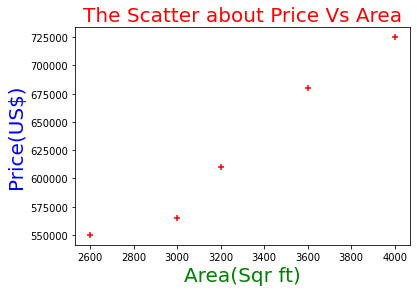

In [33]:
%matplotlib inline
plt.ylabel('Price(US$)', fontsize=20, color='blue')
plt.xlabel('Area(Sqr ft)', fontsize=20, color='green')
plt.title('The Scatter about Price Vs Area', fontsize=20, color='red')
plt.scatter(df.area, df.price, marker='+', color='red')

#### Price = m * Area + b

In [12]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [14]:
reg.predict([[3000]])

array([587979.45205479])

In [16]:
reg.predict([[40052]])

array([5619184.24657534])

In [17]:
reg.predict([[100]])

array([194195.20547945])

## <font color='red'>Manual Calculation</font>

In [24]:
# Slop m
m = reg.coef_
m

array([135.78767123])

In [26]:
# Intercept b
b = reg.intercept_
b

180616.43835616432

In [34]:
#Price = m*area + b
Price  = m*3000+b
Price

array([587979.45205479])

### <font color='green'>Suppose clint give you a list of areas, Your task to find out the esstimate price of the each area</font>

In [37]:
df2 = pd.read_csv('V02_areas.csv')
df2.head(4)

,area
0,1000
1,1500
2,2300
3,3540


In [38]:
p=reg.predict(df2)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [39]:
df2[['Price']] = p

In [40]:
df2

,area,Price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [49]:
df2.to_csv('V02_PredictedPrices01.csv', index=False)